# Chapter 11. Systems of Nonlinear Differential Equations

### Contents

* Autonomous Systems
* Stability of Linear Systems
* Linearization and Local Stability
* Autonomous Systems as Mathematical Models
* Periodic Solutions, Limit Cycles, and Global Stability

## 11.1 Autonomous Systems

A system of first-order differential equations is called **autonomous** when the system can be written in the form

>$
\begin{align*}
 \frac{dx_1}{dt} &=g_1(x_1,x_2,\cdots,x_n) \\ 
 \frac{dx_2}{dt} &=g_2(x_1,x_2,\cdots,x_n) \\ 
    & \;\vdots \\ 
 \frac{dx_n}{dt} &=g_n(x_1,x_2,\cdots,x_n)
\end{align*}
$

Notice that the independent variable $t$ does not appear explicitly on the right-hand side of each differential
equation.

* **Second-Order DE as a System**

  Any second-order differential equation $x''=g(x,x')$ can be written as an autonomous system. 
  If we let $y=x'$, the second-order differential equation becomes the system of two first-order equations
  
  >$
  \begin{align*}
     x' &= y\\ 
     y' &= g(x,y) 
  \end{align*}
  $
  
  ---
  
  **Example:** The displacement angle $\theta$ for a pendulum satisfies the nonlinear second-order
  differential equation
  
  >$\displaystyle\frac{d^2 \theta}{dt^2} +\frac{g}{l}\sin\theta=0$
  
  If we let $x=\theta$ and $y=\theta'$, this second-order differential equation can be written as the autonomous system
  
  >$
  \begin{align*}
     x' &= y\\ 
     y' &= -\frac{g}{l}\sin x
  \end{align*}
  $

  ---
  
* **Plane Autonomous System**
  
  When $n=2$, the system is called a **plane autonomous system**, and we write the system as
  
  >$\displaystyle
  \begin{align*}
     \frac{dx}{dt} &= P(x,y)\\ 
     \frac{dy}{dt} &= Q(x,y)
  \end{align*}
  $
  
  If $P(x,y)$, $Q(x,y)$, and the first-order partial derivatives $\partial P/\partial x$,
  $\partial P/\partial y$, $\partial Q/\partial x$, and $\partial Q/\partial y$ are continuous in a
  region $R$ of the plane, then a solution to the plane autonomous system that satisfies 
  $\mathbf{x}(0)=\mathbf{x}_0$ is unique and one of three basic types:
  
    * A **constant solution**, $\mathbf{x}(t)=\mathbf{x}_0$ for all $t$. 
    A constant solution is called a **critical** or **stationary point**. Note that since $\mathbf{x}'=\mathbf{0}$,
    a critical point is a solution of the system of algebraic equations
    
    >$\displaystyle
      \begin{align*}
         P(x,y) &= 0\\ 
         Q(x,y) &= 0
      \end{align*}
    $
    
    * An **arc**, $\mathbf{x}(t)$ - a plane curve that does not cross itself
    
    <img src="figures/ch11_figure01.png" width="200">
    
    * A **periodic solution** or **cycle**, $\mathbf{x}(t +p)=\mathbf{x}(t)$
    
    <img src="figures/ch11_figure02.png" width="100"> 

### Exercises 11.1

* 1

## 11.2 Stability of Linear Systems

If $\mathbf{x}_1$ is a critical point of a plane autonomous system and $\mathbf{x}=\mathbf{x}(t)$ is a solution
satisfying $\mathbf{x}(0)=\mathbf{x}_0$, 

>when $\mathbf{x}_0$ is placed near $\mathbf{x}_1$.

<img src="figures/ch11_figure03.png" width="150">

>**(a)** It may return to the critical point <br>
**(b)** It may remain close to the critical point without returning <br>
**(c)** It may move away from the critical point





* **Stability Analysis**

  A careful geometric analysis of the solutions to the *linear* plane autonomous system
  
  >$
    \begin{align*}
       x'&= ax +by\\ 
       y'&= cx +dy
    \end{align*}
   $
  
  in terms of the eigenvalues and eigenvectors of the coefficient matrix
  
  >$\mathbf{A}=
    \begin{pmatrix}
     a & b\\ 
     c & d
    \end{pmatrix}
   $
   
  drives the stabilty analysis. 
  
  To ensure that $\mathbf{x}_0=(0,\,0)$ is the only critical point,
  we will assume that the determinant $\Delta = ad -bc \neq 0$. If $\tau = a + d$ is the trace of matrix $\mathbf{A}$,
  then the characteristic equation $\mathrm{det}(\mathbf{A} -\lambda\mathbf{I})=0$ can be rewritten as
  
  >$\lambda^2 -\tau\lambda +\Delta =0$
  
  Therefore the eigenvalues of $\mathbf{A}$ are 
  
  >$\displaystyle\lambda =\frac{\tau \pm \sqrt{\tau^2 -4\Delta}}{2}$
  
  and the usual three cases for these roots occur according to whether $\tau^2 -4\Delta$ is positive, negative,
  or zero.

---

**Example:** Find the eigenvalues of the linear system

>$
    \begin{align*}
       x'&= -x +y\\ 
       y'&= cx -y
    \end{align*}
 $
 
in terms of $c$, and use a numerical solver to discover the shapes of solutions corresponding to the cases
$c=\frac{1}{4}$, $4$, $0$, and $-9$. $\mathbf{A}$ has trace $\tau=-2$ and determinant $\Delta=1 -c$, 
and so the eigenvalues are

>$
  \lambda =-1 \pm \sqrt{c}
 $
 
The nature of the eigenvalues is therefore determined by the value of $c$ 

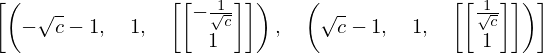

In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing(use_unicode=True)

c = sp.Symbol('c')
A = sp.Matrix([[-1, 1], [c, -1]])
A.eigenvects()

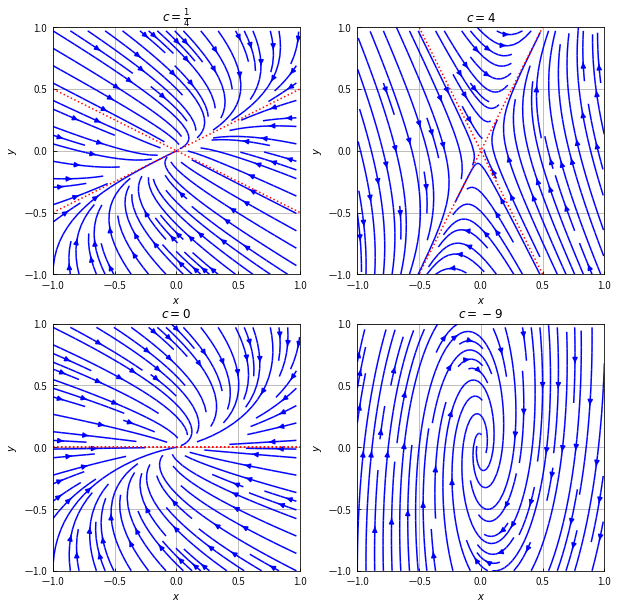

In [2]:
w = 1
xp = np.linspace(-w, w, 50)
yp = np.linspace(-w, w, 50)
x, y = np.meshgrid(xp, yp)

c_ = np.array([1/4, 4, 0, -9])
c_title = [r'$c=\frac{1}{4}$', r'$c=4$', r'$c=0$', r'$c=-9$']

fig = plt.figure(figsize=(10, 10))

for i in range(4):
    
    ax = fig.add_subplot(2, 2, i +1)

    xdot = -x +y
    ydot = c_[i]*x -y
    
    if c_[i] >= 0.0:
        y_1 = -np.sqrt(c_[i])*xp
        y_2 = np.sqrt(c_[i])*xp
        ax.plot(xp, y_1, 'r:', xp, y_2, 'r:')    
    ax.streamplot(x, y, xdot, ydot, color='blue')

    ax.set_title(c_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=6)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 5))
    ax.yaxis.set_ticks(np.linspace(-w, w, 5))

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')     

---

Trajectory behaviors in phase portraits can be explained with eigenvalue-eigenvector of $\mathbf{A}$

#### **Real Distinct Eigenvalues** ($\tau^2 -4\Delta > 0$)

>$
\begin{align*}
 \mathbf{x}(t)&= c_1\mathbf{k}_1 e^{\lambda_1 t} +c_2\mathbf{k}_2 e^{\lambda_2 t}\\ 
 &\;\big\Downarrow \;\lambda_1 >\lambda_2\\ 
 &= e^{\lambda_1 t} \left[c_1\mathbf{k}_1 +c_2\mathbf{k}_2 e^{(\lambda_2 -\lambda_1)t} \right ] \\
 &\;\big\Downarrow \;\,t \to \infty\\
 &\simeq c_1\mathbf{k}_1 e^{\lambda_1 t}
\end{align*}
 $
 
* **Both eigenvalues negative** ($\tau^2 -4\Delta > 0$, $\tau<0$, $\Delta>0$) 
   
  **Stable Node:** Since both eigenvalues are negative, it follows that 
  $\lim_{t \to \infty} \mathbf{x}(t)=\mathbf{0}$ in the direction of $\mathbf{k}_1$ when $c_1 \neq 0$ or
  in the direction of $\mathbf{k}_2$ when $c_1=0$
    
* **Both eigenvalues positive** ($\tau^2 -4\Delta > 0$, $\tau>0$, $\Delta>0$)
   
   **Unstable Node:** $\mathbf{x}(t)$ becomes unbounded in the direction of 
   $\mathbf{k}_1$ when $c_1 \neq 0$ or in the direction of $\mathbf{k}_2$ when $c_1=0$ 
   
* **Eigenvalues have opposite signs** ($\tau^2 -4\Delta > 0$, $\Delta<0$)
   
   **Saddle Point:** When $c_1=0$, $\mathbf{x}(t)$ will approach $\mathbf{0}$ along the line determined by 
   $\mathbf{k}_2$. If $\mathbf{x}(0)$ does not lie on the line determined by $\mathbf{k}_2$, the direction
   determined by $\mathbf{k}_1$ serves as an asymtote for $\mathbf{x}(t)$ 

---

**Example:** Classify the critical point $(0,0)$ of each of the following linear system 
$\mathbf{x}'=\mathbf{A}\mathbf{x}$ as either a stable node, an unstable node, or a saddle point

>(a) $\begin{pmatrix} -2 & -2\\ -2 & -5 \end{pmatrix}$,
(b) $\begin{pmatrix} -1 & -2\\ \;\;3 & \;\;4 \end{pmatrix}$,
(c) $\begin{pmatrix} 2 & -1\\ 3 & -2 \end{pmatrix}$

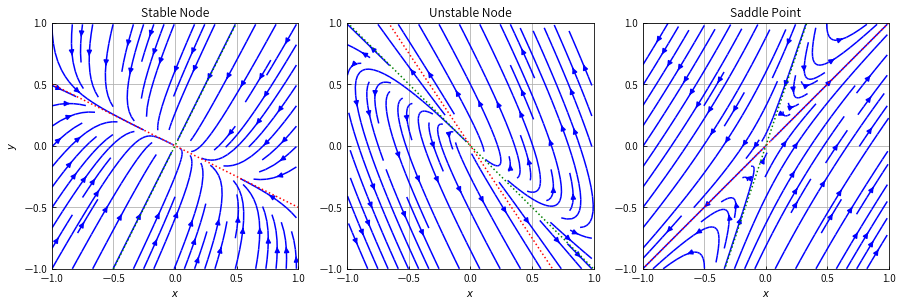

In [3]:
w = 1
xp = np.linspace(-w, w, 6)
yp = np.linspace(-w, w, 6)
x, y = np.meshgrid(xp, yp)

A = np.array([[[-2, -2], [-2, -5]],[[-1, -2], [3, 4]],[[2, -1], [3, -2]]])
A_title = ['Stable Node', 'Unstable Node', 'Saddle Point']

fig = plt.figure(figsize=(15, 5))

for i in range(3):
    xdot = A[i,0,0]*x +A[i,0,1]*y
    ydot = A[i,1,0]*x +A[i,1,1]*y

    lamda, v = np.linalg.eig(A[i])

    if lamda[0] >= lamda[1]:
        y_1 = v[1,0]/v[0,0]*xp
        y_2 = v[1,1]/v[0,1]*xp
    else:
        y_1 = v[1,1]/v[0,1]*xp
        y_2 = v[1,0]/v[0,0]*xp       

    ax = fig.add_subplot(1, 3, i +1)
    
    ax.plot(xp, y_1, 'r:', xp, y_2, 'g:')    
    ax.streamplot(x, y, xdot, ydot, color='blue')

    ax.set_title(A_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=5)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 5))
    ax.set_xlabel(r'$x$')
    
    ax.yaxis.set_ticks(np.linspace(-w, w, 5))
    if i == 0:
        ax.set_ylabel(r'$y$')

#### **A Repeated Real Eigenvalue** ($\tau^2 -4\Delta = 0$)

The general solution takes on one of two different forms depending on whether **one** or **two** linearly independent
eigenvectors can be found for the repeated eigenvalues $\lambda_1$

* **Two linearly independent eigenvectors**

  If $\mathbf{k}_1$ and $\mathbf{k}_2$ are two linearly independent eigenvectors corresponding to $\lambda_1$,
  then the general solution is given by
  
  >$\mathbf{x}(t)=c_1\mathbf{k}_1 e^{\lambda_1 t} +c_2\mathbf{k}_2 e^{\lambda_1 t}=
    \left(c_1\mathbf{k}_1 + c_2\mathbf{k}_2 \right) e^{\lambda_1 t}$
   
  If $\lambda_1<0$, the $\mathbf{x}(t)$ approaches $\mathbf{0}$ along the line determined by the vector
  $c_1\mathbf{k}_1 + c_2\mathbf{k}_2$ and the critical point is a **degenerate stable node**.
  The arrows are reversed when $\lambda_1>0$, and the critical point is a **degenerate unstable node**
  
* **A single linearly independent eigenvectors**
  
  When only a single linearly independent eigenvector $\mathbf{k}_{11}$ exists, the general solution is 
  given by
  
  >$\begin{align*}
     \mathbf{x}(t)&=c_1\mathbf{k}_{11} e^{\lambda_1 t} +c_2\left(\mathbf{k}_{11} te^{\lambda_1 t} 
            +\mathbf{k}_{12} e^{\lambda_1 t}\right)\\
         &=te^{\lambda_1 t}\left[c_2 \mathbf{k}_{11} +\frac{1}{t} \left(c_1\mathbf{k}_{11} 
            +c_2\mathbf{k}_{12}\right) \right]\\
         &\Downarrow\;\;t \to \infty\\
      \mathbf{x}(t)&\simeq c_2 \mathbf{k}_{11} te^{\lambda_1 t}
    \end{align*}$
    
  where $(\mathbf{A} -\lambda_1\mathbf{I})\mathbf{k}_{12}=\mathbf{k}_{11}$. 
  If $\lambda_1<0$, then $\lim_{t \to \infty} te^{\lambda_1 t}=0$ and it follows that $\mathbf{x}(t)$
  approaches $\mathbf{0}$ in the line determined by $\mathbf{k}_{11}$. The critical point is
  again a **degenerate stable node**. When $\lambda_1>0$, $\mathbf{x}(t)$ becomes unbounded as $t$ increases, 
  and the critical point is a **degenerate unstable node** 

---

**Example:** Classify the critical point $(0,0)$ of each of the following linear system 
$\mathbf{x}'=\mathbf{A}\mathbf{x}$ 

>(a) $\begin{pmatrix} 1 & 0\\ 0 & 1 \end{pmatrix}$
(b) $\begin{pmatrix} 3 & -18\\ 2 &\; -9 \end{pmatrix}$,
(c) $\begin{pmatrix} \;\;2 & 4\\ -1 & 6 \end{pmatrix}$,


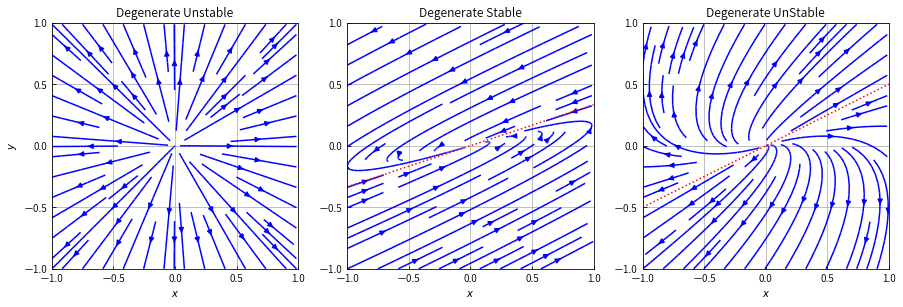

In [4]:
w = 1
xp = np.linspace(-w, w, 6)
yp = np.linspace(-w, w, 6)
x, y = np.meshgrid(xp, yp)

A = np.array([[[1, 0], [0, 1]],[[3, -18], [2, -9]],[[2, 4], [-1, 6]]])
A_title = ['Degenerate Unstable', 'Degenerate Stable', 'Degenerate UnStable']

fig = plt.figure(figsize=(15, 5))

for i in range(3):

    ax = fig.add_subplot(1, 3, i +1)
    
    xdot = A[i,0,0]*x +A[i,0,1]*y
    ydot = A[i,1,0]*x +A[i,1,1]*y

    lamda, v = np.linalg.eig(A[i])
    
    if i != 0:
        y_1 = v[1,0]/v[0,0]*xp
        ax.plot(xp, y_1, 'r:')
            
    ax.streamplot(x, y, xdot, ydot, color='blue')

    ax.set_title(A_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=5)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 5))
    ax.set_xlabel(r'$x$')
    
    ax.yaxis.set_ticks(np.linspace(-w, w, 5))
    if i == 0:
        ax.set_ylabel(r'$y$')